In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
     1.Administrative : Administrative Value

     2.Administrative_Duration : Duration in Administrative Page

     3.Informational : Informational Value

     4.Informational_Duration : Duration in Informational Page

     5.ProductRelated : Product Related Value

     6.ProductRelated_Duration : Duration in Product Related Page

     7.BounceRates : Bounce Rates of a web page
     i.e is feature for a web page refers to the percentage of visitors who enter the site from that page
     and then leave ("bounce") without triggering any other requests to the analytics server during that session

     8.ExitRates : Exit rate of a web page
     i.e is for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
     9.PageValues : Page values of each web page
    i.e is average value for a web page that a user visited before completing an e-commerce transaction
    
    
     how it calculated 
     Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce      transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your          site's revenue. If the page wasn't involved in an ecommerce transaction for your website in any way, then the Page Value for that page will be 0 since the page was never visited in a session where a transaction occurred.
        
        Ecommerce Revenue + Total Goal Value
        Number of Unique Pageviews for Given Page
        
        
        
    10.SpecialDay : Special days like valentine etc
    visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely 
    to be finalized with transaction.

    11.Month : Month of the year

    12.OperatingSystems : Operating system used
    13.Browser : Browser used
    14.Region : Region of the user
    15.TrafficType : Traffic Type
    16.VisitorType : Types of Visitor
    17.Weekend : Weekend or not
    18.Revenue : Revenue will be generated or not

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [5]:
data.shape  ### cheack the shape of the data 

(12330, 18)

In [6]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
percent      ### checking the percent of the data is misssing 

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [7]:
data['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [8]:
data['SpecialDay'] = data['SpecialDay'].astype('object')
data['OperatingSystems'] = data['OperatingSystems'].astype('object')
data['Browser'] = data['Browser'].astype('object')
data['Region'] = data['Region'].astype('object')
data['TrafficType'] = data['TrafficType'].astype('object')


In [9]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
data_num_cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
data_cat_cols = data[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']]

In [11]:
data_num_cols.head() ### numerical columns of the data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0


In [12]:
data_cat_cols.head() ### categorical columns of the data 

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,1,1,Returning_Visitor,False,False
1,Feb,2,2,1,2,Returning_Visitor,False,False
2,Feb,4,1,9,3,Returning_Visitor,False,False
3,Feb,3,2,2,4,Returning_Visitor,False,False
4,Feb,3,3,1,4,Returning_Visitor,True,False


### univarient analysis


    Here we see that outliers on the data 

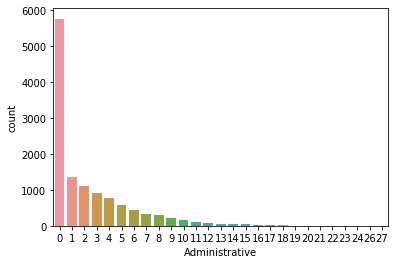

In [13]:
sns.countplot(data_num_cols.Administrative)

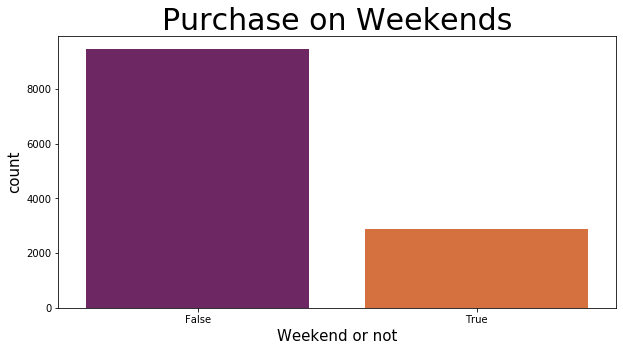

In [14]:
# checking the Distribution of customers on Weekend
plt.figure(figsize=(10,5))
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

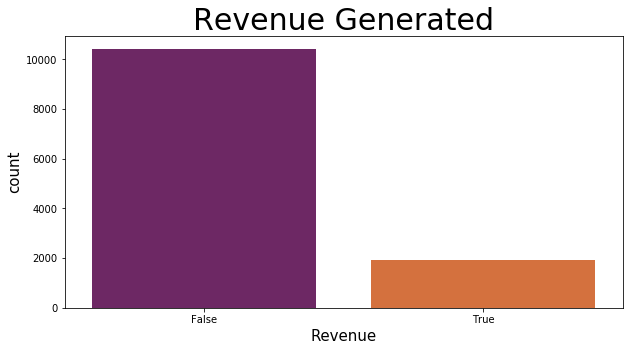

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data['Revenue'], palette = 'inferno')
plt.title('Revenue Generated', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

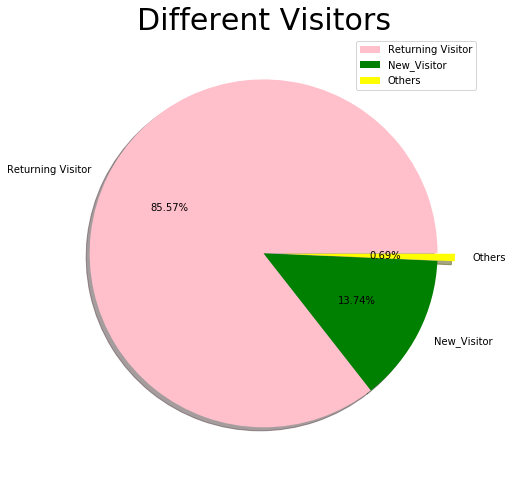

In [16]:
# plotting a pie chart for browsers

plt.figure(figsize=(12,8))
size = [10551, 1694, 85]
colors = ['pink', 'green', 'yellow']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

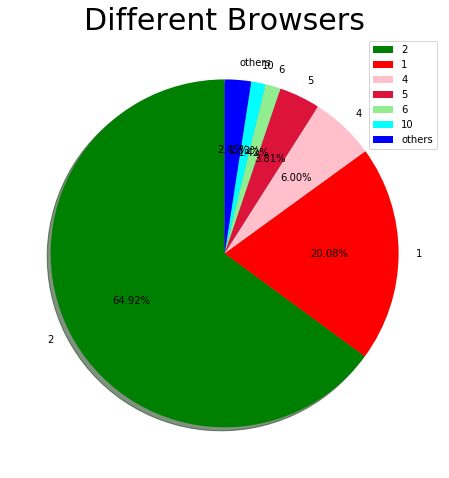

In [17]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['green', 'red', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.figure(figsize=(20,8))
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

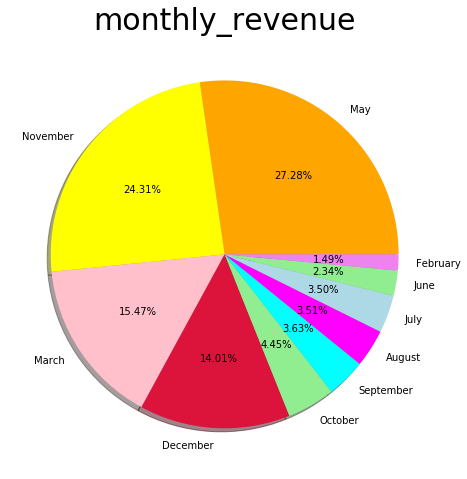

In [24]:
plt.figure(figsize = (15,8))
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(size, colors = colors,labels =labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('monthly_revenue', fontsize = 30)
p = plt.gcf()
plt.axis('off')


plt.show()


In [23]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

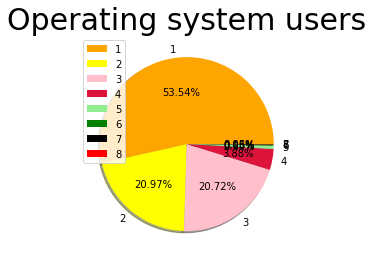

In [24]:
size = [6601, 2585, 2555, 478, 79,19,7,6]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen','green','black','red']
labels = "1", "2","3","4","5","6","7","8"
explode = [0, 0, 0, 0, 0,0,0,0]


plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Operating system users', fontsize = 30)
plt.axis('off')
plt.legend()

Text(0, 0.5, 'Count')

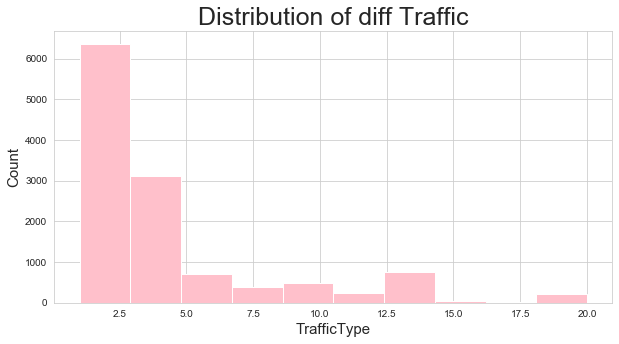

In [25]:

# visualizing the distribution of customers around the Region
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.hist(data['TrafficType'],color='pink')
plt.title('Distribution of diff Traffic',fontsize = 25)
plt.xlabel('TrafficType', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

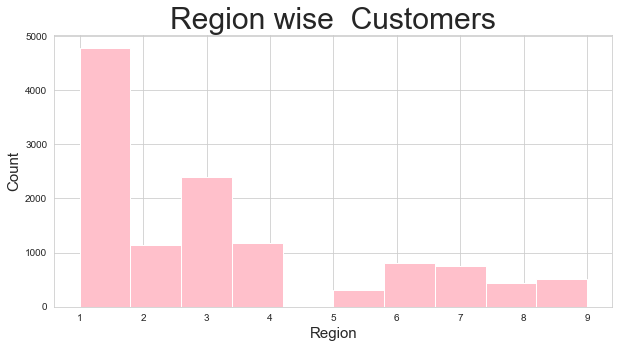

In [26]:
# visualizing the distribution of customers around the Region
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.hist(data['Region'], color = 'pink')
plt.title('Region wise  Customers',fontsize = 30)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


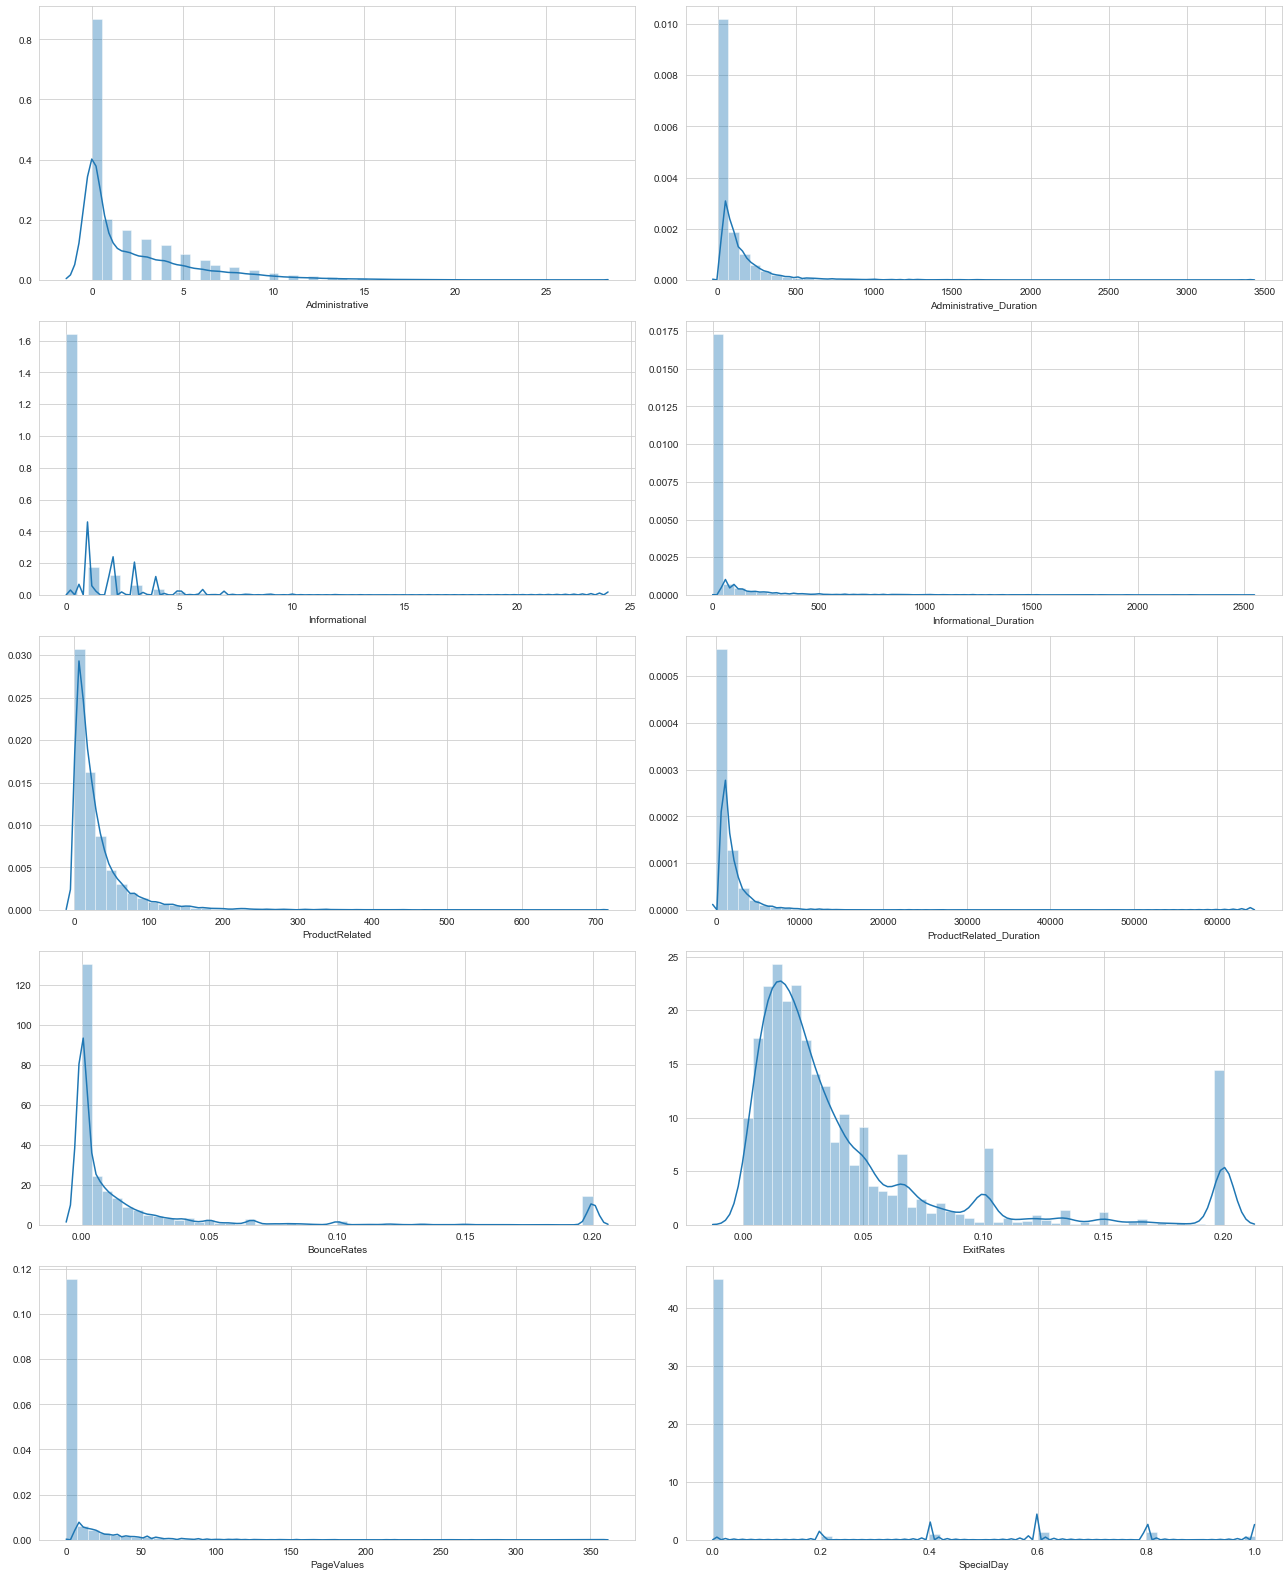

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = data_num_cols.columns
fig, ax = plt.subplots(5,2,figsize=(18,22))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data_num_cols[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

### `Bivarient_analysis

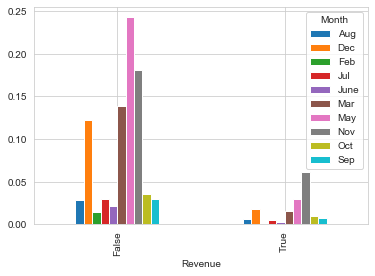

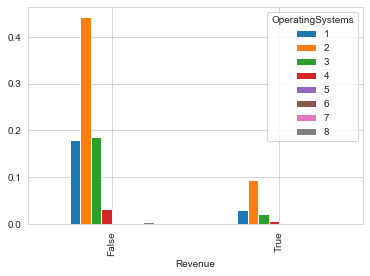

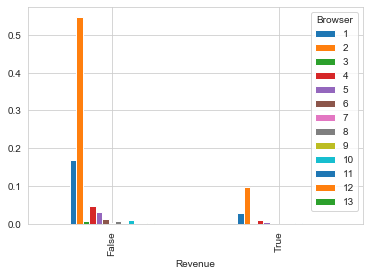

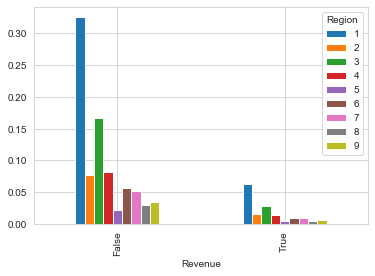

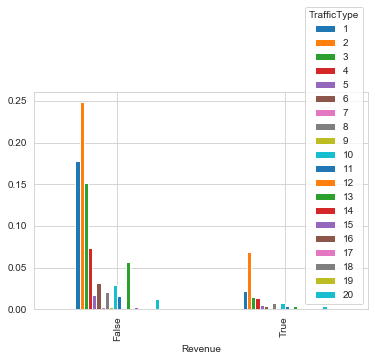

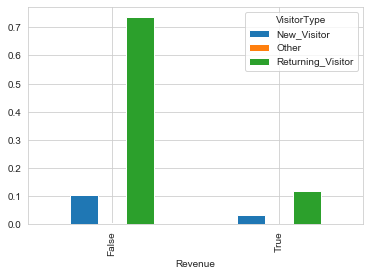

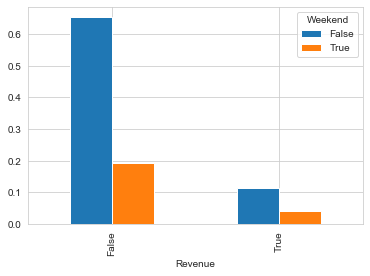

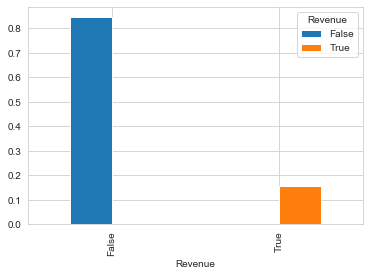

In [29]:
for i, col in enumerate(data_cat_cols):
    pd.crosstab(data['Revenue'], data[col], normalize=True).plot.bar()
    
plt.show()

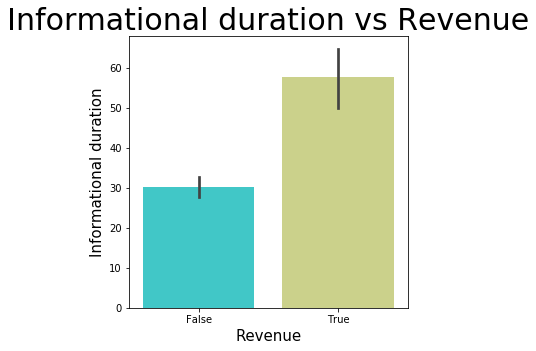

In [28]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (5, 5)


sns.barplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Informational duration vs Revenue', fontsize = 30)
plt.ylabel('Informational duration', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

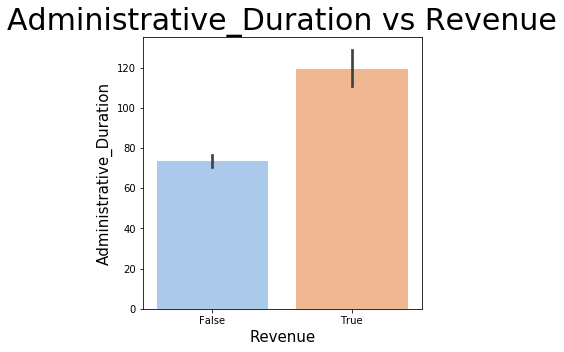

In [26]:

sns.barplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Administrative_Duration vs Revenue', fontsize = 30)
plt.ylabel('Administrative_Duration', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

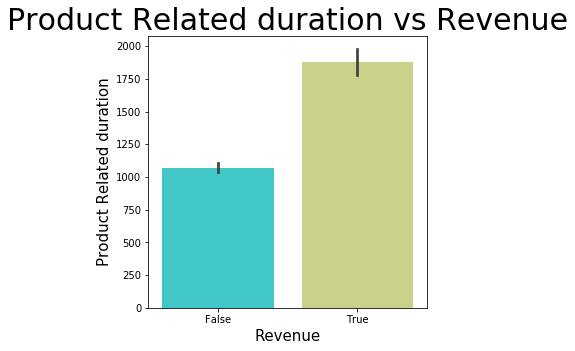

In [27]:
sns.barplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'rainbow')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.ylabel('Product Related duration', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

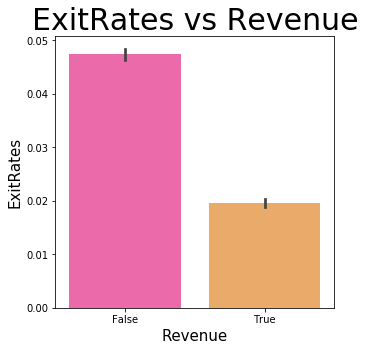

In [29]:

sns.barplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.ylabel('ExitRates', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

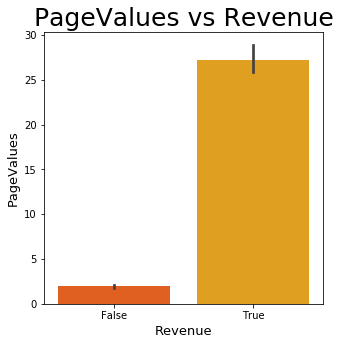

In [33]:
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 25)
plt.ylabel('PageValues', fontsize = 13)
plt.xlabel('Revenue', fontsize = 13)
plt.show()

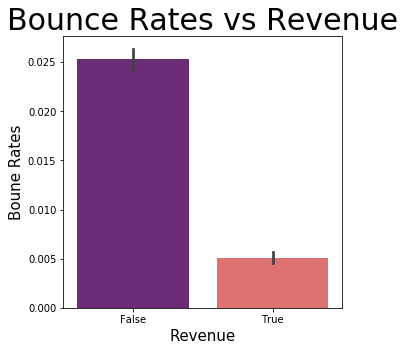

In [34]:

sns.barplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.ylabel('Boune Rates', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

plt.show()

### identify  the outliers

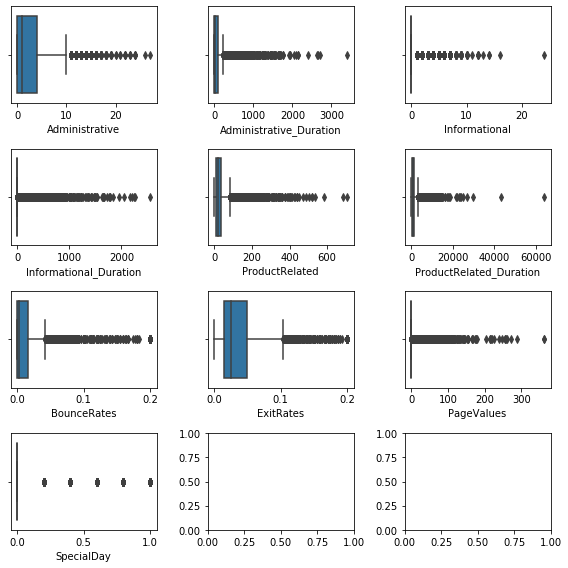

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = data_num_cols.columns
fig, ax = plt.subplots(4,3,figsize=(8,8))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

In [101]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_num_cols))  ## using mathamatical function finding the outliers
print(z)

[[0.69699296 0.4571914  0.3964779  ... 3.22931559 0.31717784 0.30882137]
 [0.69699296 0.4571914  0.3964779  ... 1.1714725  0.31717784 0.30882137]
 [0.69699296 0.4571914  0.3964779  ... 3.22931559 0.31717784 0.30882137]
 ...
 [0.69699296 0.4571914  0.3964779  ... 0.89709343 0.31717784 0.30882137]
 [0.50722805 0.03291592 0.3964779  ... 0.45314046 0.31717784 0.30882137]
 [0.69699296 0.4571914  0.3964779  ... 0.48552481 0.31717784 0.30882137]]


In [102]:
threshold = 3
print(np.where(z > 3))

(array([    0,     0,     2, ..., 12313, 12321, 12321], dtype=int64), array([6, 7, 6, ..., 8, 6, 7], dtype=int64))


In [103]:
Q1 = data_num_cols.quantile(0.25)
Q3 = data_num_cols.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Administrative                4.000000
Administrative_Duration      93.256250
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               31.000000
ProductRelated_Duration    1280.019713
BounceRates                   0.016813
ExitRates                     0.035714
PageValues                    0.000000
SpecialDay                    0.000000
dtype: float64


### treating the outliers (num_cols)

In [104]:
data_num_cols.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

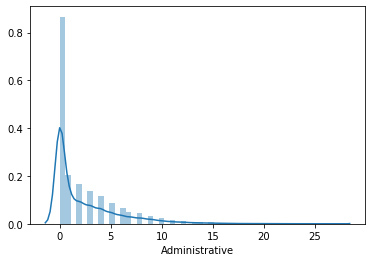

In [105]:
sns.distplot(data_num_cols['Administrative'])

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
data_num_cols['Administrative']=np.sqrt(np.sqrt(data_num_cols['Administrative']))

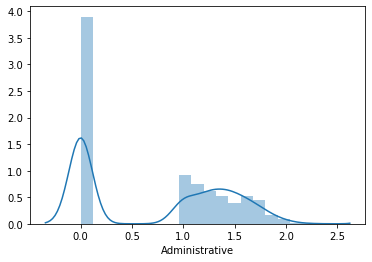

In [108]:
sns.distplot(data_num_cols['Administrative'])

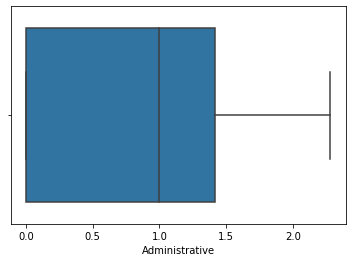

In [113]:
sns.boxplot(data_num_cols['Administrative'])

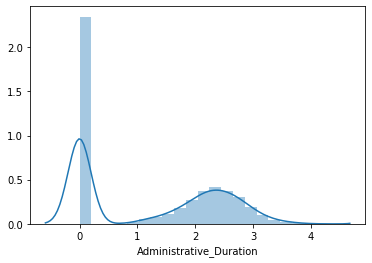

In [117]:
sns.distplot(data_num_cols['Administrative_Duration'])

In [118]:
data_num_cols['Administrative_Duration'] = np.log1p(np.sqrt(data_num_cols['Administrative_Duration']))

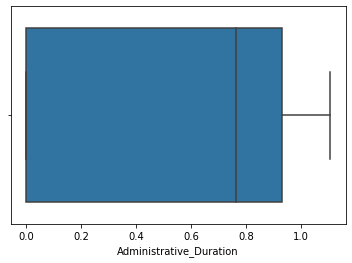

In [119]:
sns.boxplot(data_num_cols['Administrative_Duration'])

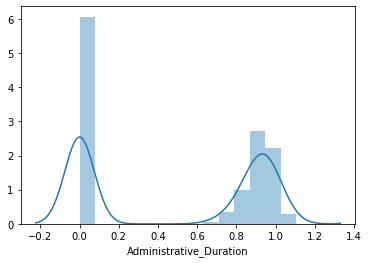

In [120]:
sns.distplot(data_num_cols['Administrative_Duration'])

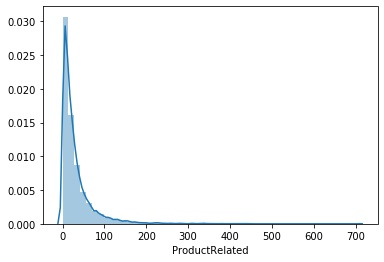

In [132]:
sns.distplot(data_num_cols['ProductRelated'])

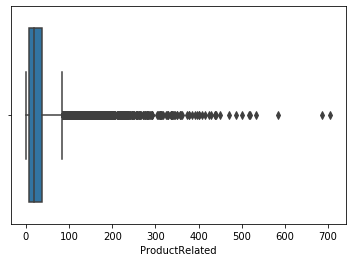

In [133]:
sns.plot(data_num_cols['ProductRelated'])

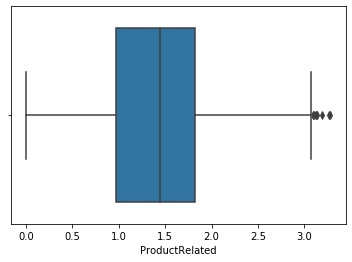

In [128]:
sns.boxplot(np.(np.sqrt(data_num_cols['ProductRelated'])))

In [134]:
data_num_cols['ProductRelated']=np.sqrt(np.sqrt(data_num_cols['ProductRelated']))

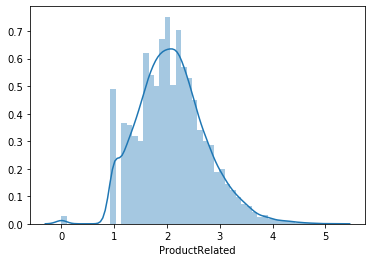

In [135]:
sns.distplot(data_num_cols['ProductRelated'])

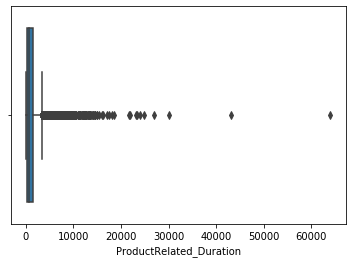

In [138]:
sns.boxplot(data_num_cols['ProductRelated_Duration'])

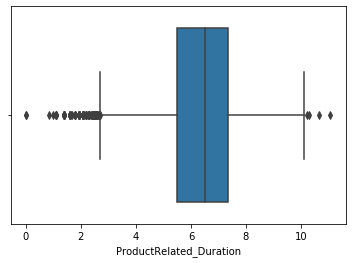

In [151]:
sns.boxplot(np.exp(np.log(np.log(data_num_cols['ProductRelated_Duration']))))

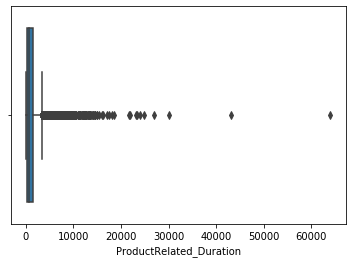

In [167]:
sns.boxplot(np.exp(np.log(data_num_cols['ProductRelated_Duration'])))

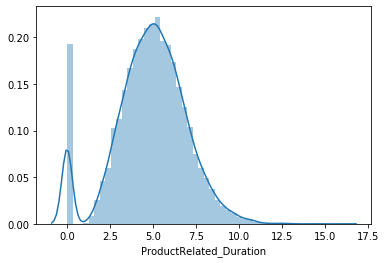

In [176]:
sns.distplot(np.sqrt(np.exp(np.log(np.sqrt(np.exp(np.log(data_num_cols['ProductRelated_Duration'])))))))

In [177]:
data_num.isnull().sum()

NameError: name 'data_num' is not defined

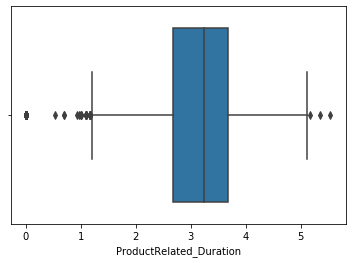

In [137]:
sns.boxplot(np.log1p(np.sqrt(data_num_cols['ProductRelated_Duration'])))